In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
df = pd.read_csv("E:\\ENTRI DSML\\DSML\\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#To check the null value,datatype, number of columns and number of values
df.info()

# Checking for missing values
Null_value=df.isnull().sum()
Null_value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
#To check the number of duplicate values
Dup = df.duplicated().sum()
if Dup >0:
    print("There is ",Dup,"Duplicate value")
else:
    print("No Duplicate value")

# Dropping rows with missing values (or alternatively, we can impute)
df = df.dropna()

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separating the dependent (price) and independent variables
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

No Duplicate value


In [7]:
# Importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
linear_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()

# Train models
linear_reg.fit(X_train_scaled, y_train)
dt_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train_scaled, y_train)
gb_reg.fit(X_train_scaled, y_train)
svr_reg.fit(X_train_scaled, y_train)

# Predict using each model
y_pred_lr = linear_reg.predict(X_test_scaled)
y_pred_dt = dt_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test_scaled)
y_pred_gb = gb_reg.predict(X_test_scaled)
y_pred_svr = svr_reg.predict(X_test_scaled)

In [8]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# Evaluate all models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
predictions = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_gb, y_pred_svr]

for model, pred in zip(models, predictions):
    mse, mae, r2 = evaluate_model(y_test, pred)
    print(f"{model}:")
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    print('-' * 40)

Linear Regression:
MSE: 2691094269002149190554666793959424.00, MAE: 32175333476296084.00, R-squared: -34088639507030622836097024.00
----------------------------------------
Decision Tree:
MSE: 10532678.53, MAE: 2098.31, R-squared: 0.87
----------------------------------------
Random Forest:
MSE: 3652007.20, MAE: 1378.89, R-squared: 0.95
----------------------------------------
Gradient Boosting:
MSE: 5402849.38, MAE: 1685.62, R-squared: 0.93
----------------------------------------
SVR:
MSE: 86973995.15, MAE: 5705.06, R-squared: -0.10
----------------------------------------


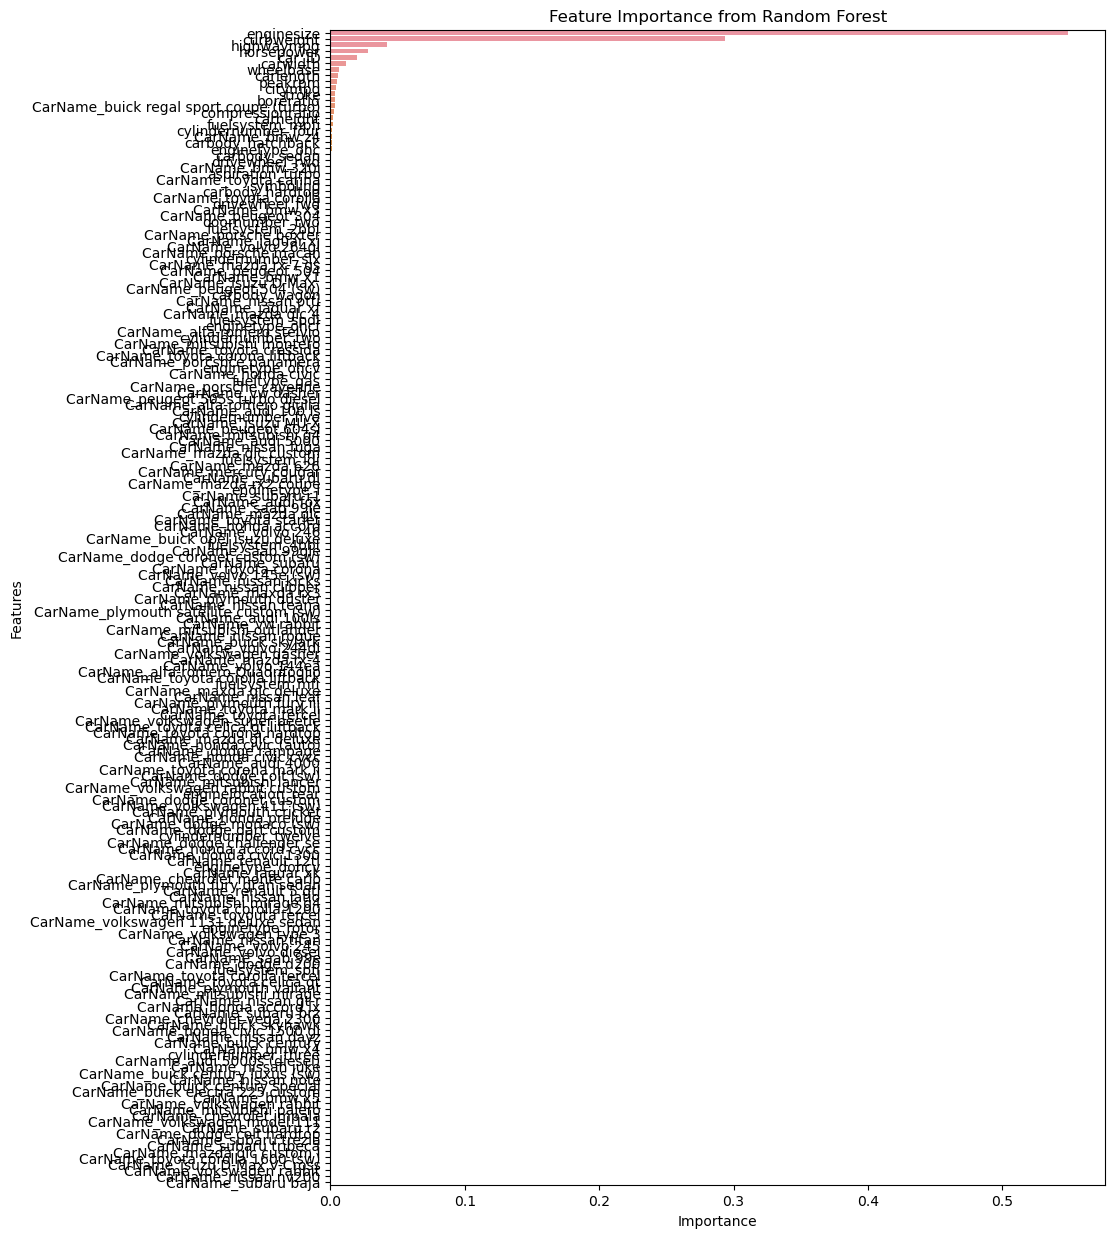

In [10]:
# Feature Importance from Random Forest
importance_rf = rf_reg.feature_importances_

# Plotting feature importance
feature_names = X.columns
importance_df = pd.DataFrame({'Features': feature_names, 'Importance': importance_rf})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [22]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluating the performance of the tuned model
mse, mae, r2 = evaluate_model(y_test, y_pred_best_rf)
print(f"After Tuning - Random Forest: MSE: {mse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
After Tuning - Random Forest: MSE: 3588958.06, MAE: 1333.87, R-squared: 0.95
